In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/queue_data.csv")

df.head()

,timestamp,day_of_week,hour,customers_in_queue,active_counters,service_time,wait_time
0,2025-11-30 07:49:25.286872,5,9,0,3,4.53,0.0
1,2025-11-30 08:01:46.286872,5,9,0,3,6.08,0.0
2,2025-11-30 08:31:25.286872,5,9,0,3,3.21,0.0
3,2025-11-30 07:53:15.286872,5,9,0,3,3.29,0.0
4,2025-11-30 07:48:43.286872,5,9,0,3,3.23,0.0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 8165 entries, 0 to 8164
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           8165 non-null   str    
 1   day_of_week         8165 non-null   int64  
 2   hour                8165 non-null   int64  
 3   customers_in_queue  8165 non-null   int64  
 4   active_counters     8165 non-null   int64  
 5   service_time        8165 non-null   float64
 6   wait_time           8165 non-null   float64
dtypes: float64(2), int64(4), str(1)
memory usage: 446.7 KB


,day_of_week,hour,customers_in_queue,active_counters,service_time,wait_time
count,8165.000000,8165.000000,8165.000000,8165.000000,8165.000000,8165.000000
mean,2.645315,12.907165,0.027434,3.885242,4.376247,0.137406
std,1.923030,2.154483,0.242440,1.336164,1.827797,0.766866
min,0.000000,9.000000,0.000000,2.000000,0.930000,0.000000
25%,1.000000,11.000000,0.000000,3.000000,3.070000,0.000000
50%,3.000000,13.000000,0.000000,4.000000,4.040000,0.000000
75%,4.000000,15.000000,0.000000,5.000000,5.320000,0.000000
max,6.000000,17.000000,5.000000,6.000000,19.500000,14.510000


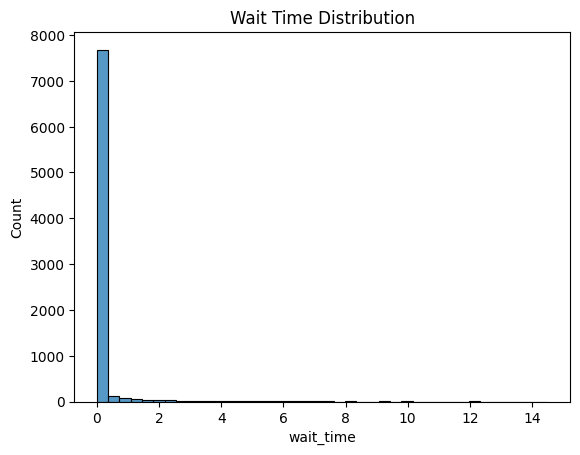

In [12]:
plt.figure()
sns.histplot(df["wait_time"], bins=40)
plt.title("Wait Time Distribution")
plt.show()


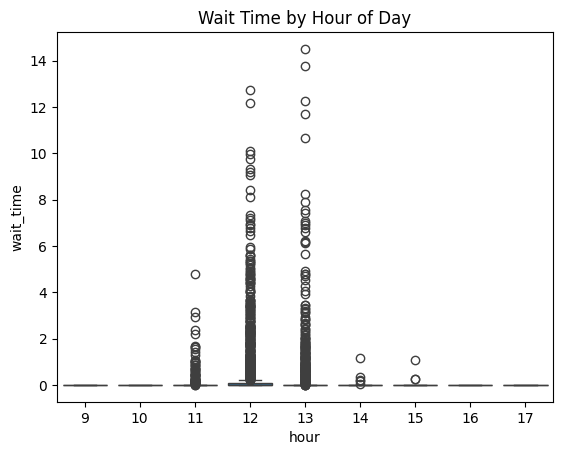

In [13]:
plt.figure()
sns.boxplot(x="hour", y="wait_time", data=df)
plt.title("Wait Time by Hour of Day")
plt.show()


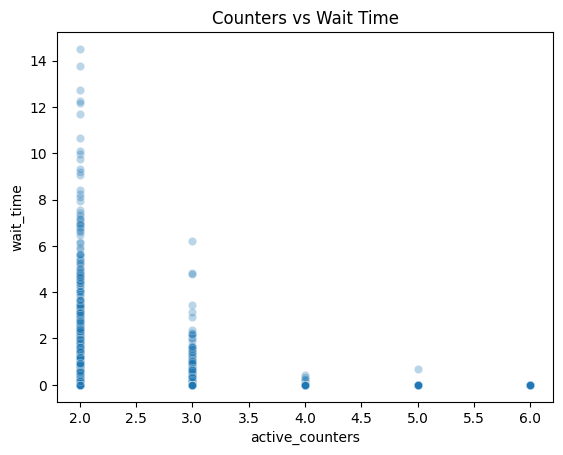

In [14]:
plt.figure()
sns.scatterplot(
    x="active_counters",
    y="wait_time",
    data=df,
    alpha=0.3
)
plt.title("Counters vs Wait Time")
plt.show()


In [15]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [16]:
df = df.sort_values("timestamp").reset_index(drop=True)

In [17]:
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)
df["is_peak_hour"] = df["hour"].between(11, 14).astype(int)


In [18]:
df["queue_lag_1"] = df["customers_in_queue"].shift(1)
df["queue_lag_5"] = df["customers_in_queue"].shift(5)
df["wait_lag_1"] = df["wait_time"].shift(1)


In [19]:
df = df.dropna().reset_index(drop=True)


In [20]:
features = [
    "hour",
    "day_of_week",
    "is_weekend",
    "is_peak_hour",
    "active_counters",
    "customers_in_queue",
    "queue_lag_1",
    "queue_lag_5",
    "service_time"
]

target = "wait_time"

X = df[features]
y = df[target]


We use chronological split

In [21]:
split_idx = int(len(df) * 0.8)

X_train = X.iloc[:split_idx]
X_val = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_val = y.iloc[split_idx:]


trying Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_val)
mae_lr = mean_absolute_error(y_val, pred_lr)

print("Baseline MAE:", round(mae_lr, 2))


Baseline MAE: 0.19


optimize it